In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import itertools
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

In [2]:
PCOS_inf = pd.read_csv('./../PCOS_infertility.csv')
PCOS_woinf = pd.read_excel('./../PCOS_data_without_infertility.xlsx', sheet_name="Full_new")

data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')

data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', 
                 '  I   beta-HCG(mIU/mL)_y', 'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

data.columns = [col.strip() for col in data.columns]

X=data.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1)
y=data["PCOS (Y/N)"]

<Figure size 432x288 with 0 Axes>

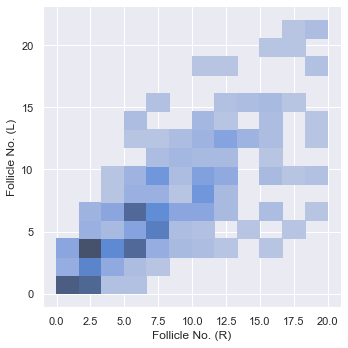

In [3]:
plt.figure()
sns.displot(data, x="Follicle No. (R)", y="Follicle No. (L)")
# plt.grid(color='white', linewidth=2)
plt.plot()
plt.savefig('figure1.png', dpi = 500)

<Figure size 432x288 with 0 Axes>

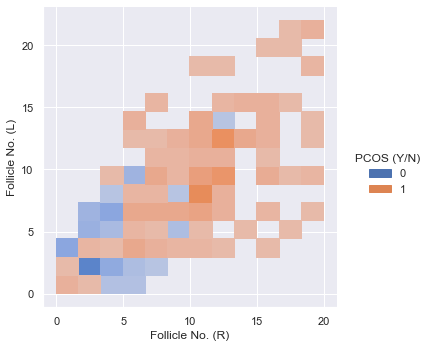

In [4]:
plt.figure()
sns.displot(data, x="Follicle No. (R)", y="Follicle No. (L)", hue="PCOS (Y/N)")
# plt.grid(color='white', linewidth=2)
plt.plot()
plt.savefig('figure2.png', dpi = 500)

<Figure size 432x288 with 0 Axes>

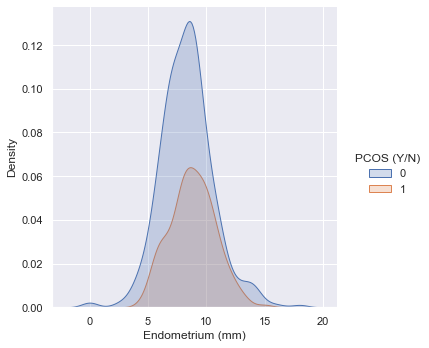

In [5]:
plt.figure()
sns.displot(data, x="Endometrium (mm)", hue="PCOS (Y/N)", kind="kde", fill=True)
# plt.grid(color='white', linewidth=2)
plt.plot()
plt.savefig('figure3.png', dpi = 500)

<Figure size 432x288 with 0 Axes>

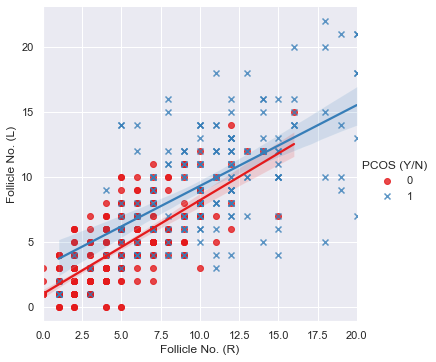

In [6]:
plt.figure()
sns.lmplot(x="Follicle No. (R)", y="Follicle No. (L)", hue="PCOS (Y/N)", data=data,
           markers=["o", "x"], palette="Set1");
# plt.grid(color='white', linewidth=2)
plt.plot()
plt.savefig('figure4.png', dpi = 500)

<Figure size 432x288 with 0 Axes>

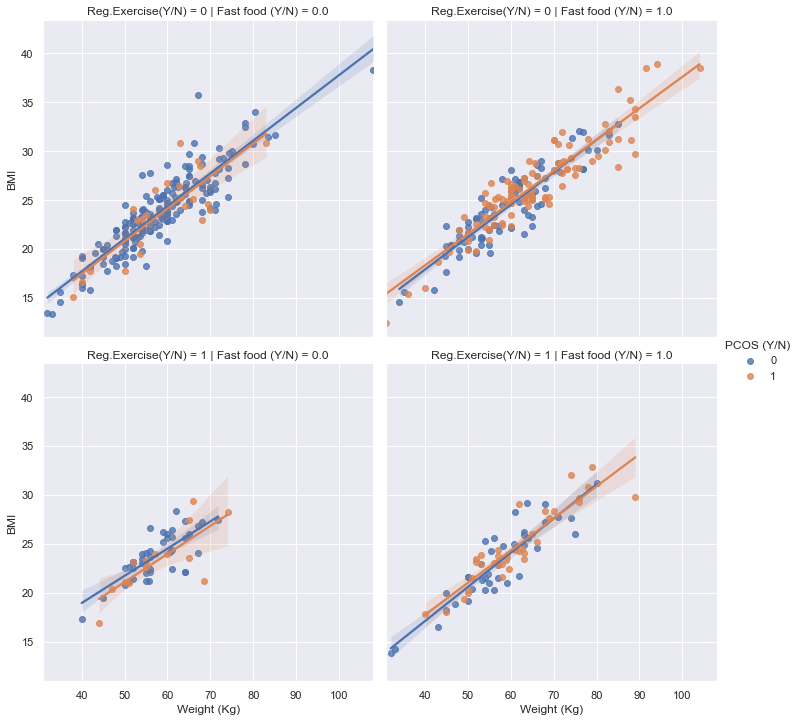

In [7]:
plt.figure()
sns.lmplot(x="Weight (Kg)", y="BMI", hue="PCOS (Y/N)",
           col="Fast food (Y/N)", row="Reg.Exercise(Y/N)", data=data);
# plt.grid(color='white', linewidth=2)
plt.plot()
plt.savefig('figure5.png', dpi = 500)

<Figure size 432x288 with 0 Axes>

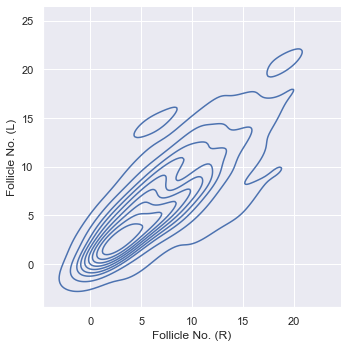

In [8]:
plt.figure()
sns.displot(data, x="Follicle No. (R)", y="Follicle No. (L)", kind="kde")
# plt.grid(color='white', linewidth=2)
plt.plot()
plt.savefig('figure6.png', dpi = 500)

<Figure size 432x288 with 0 Axes>

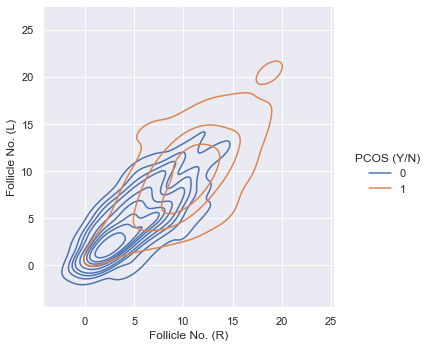

In [9]:
plt.figure()
sns.displot(data, x="Follicle No. (R)", y="Follicle No. (L)", hue="PCOS (Y/N)", kind="kde")
# plt.grid(color='white', linewidth=2)
plt.plot()
plt.savefig('figure7.png', dpi = 500)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
random_forest = RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=23, n_estimators=100)
pipe = Pipeline(steps=(['ss', ss], ['random_forest', random_forest]))

In [12]:
pipe

Pipeline(steps=(['ss', StandardScaler()],
                ['random_forest',
                 RandomForestClassifier(max_depth=8, min_samples_leaf=2,
                                        min_samples_split=23)]))

In [13]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ['random_forest',
                 RandomForestClassifier(max_depth=8, min_samples_leaf=2,
                                        min_samples_split=23)]])

In [14]:
acc_rf_clf_train = round(pipe.score(X_train, y_train)*100,2) 
acc_rf_clf_test = round(pipe.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_clf_train))
print("Testing Accuracy: % {}".format(acc_rf_clf_test))


Training Accuracy: % 95.6
Testing Accuracy: % 91.74


In [15]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
pipe_prob_y_pred = pipe.predict_proba(X_test)
pipe_fpr, pipe_tpr, pipe_threshold = roc_curve(y_test, pipe_prob_y_pred[:,1])
pipe_auc = auc(pipe_fpr, pipe_tpr)

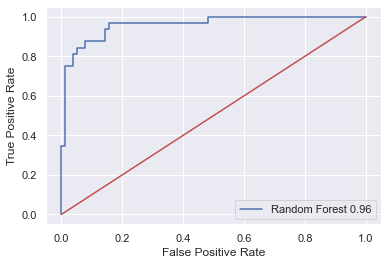

In [17]:
plt.figure()
plt.plot(pipe_fpr, pipe_tpr, label = 'Random Forest %0.2f'%pipe_auc)
plt.plot([0,1],[0,1],'r-')
plt.legend()
# plt.grid(color='white', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot()
plt.savefig('figure8.png', dpi = 500)

In [18]:
y_pred = pipe.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        77
           1       0.90      0.81      0.85        32

    accuracy                           0.92       109
   macro avg       0.91      0.89      0.90       109
weighted avg       0.92      0.92      0.92       109

